In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/Hl_phd

In [4]:
!pip install pycaret

     |████████████████████████████████| 266 kB 12.2 MB/s 
     |████████████████████████████████| 2.0 MB 65.4 MB/s 
     |████████████████████████████████| 261 kB 69.3 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 113 kB 65.8 MB/s 
     |████████████████████████████████| 1.7 MB 53.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 50.2 MB/s 
     |████████████████████████████████| 271 kB 67.8 MB/s 
     |████████████████████████████████| 167 kB 57.0 MB/s 
     |████████████████████████████████| 6.8 MB 74.8 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 596 kB 57.5 MB/s 
     |████████████████████████████████| 675 kB 46.2 MB/s 
     |██████████████████

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
import pandas as pd

In [8]:
dataset.columns

Index(['subsite_store', 'shipment_state', 'total', 'currency', 'bill_city',
       'bill_zipcode', 'bill_country_iso_name', 'quantity', 'completed_year',
       'completed_month', 'completed_day'],
      dtype='object')

In [10]:
dataset['subsite_store'].unique()

array(['Klippkungen', 'Godisgruvan'], dtype=object)

In [11]:
dataset['shipment_state'].unique()

array(['shipped', 'ready'], dtype=object)

In [12]:
dataset['currency'].unique()

array(['SEK', 'DKK', 'NOK', 'EUR'], dtype=object)

In [13]:
dataset['bill_city'].unique()

array(['Loftahammar', 'Uppsala', 'Anderstorp', ..., 'Fagersta', 'Laxå',
       'Ed'], dtype=object)

In [14]:
dataset['bill_zipcode'].unique()

array(['59095', '75653', '33433', ..., '775 50', '668 32', '261 63'],
      dtype=object)

In [15]:
dataset['bill_country_iso_name'].unique()

array(['SE', 'DK', 'NO', 'FI'], dtype=object)

In [16]:
dataset.shape

(2195, 11)

In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/Hl_phd/export_dataframe_prod2.csv')

In [18]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2085, 11)
Unseen Data For Predictions: (110, 11)


In [19]:
from pycaret.classification import *

In [20]:
exp_clf101 = setup(data = data, target = 'shipment_state', session_id=123)

,Description,Value
0,session_id,123
1,Target,shipment_state
2,Target Type,Binary
3,Label Encoded,"ready: 0, shipped: 1"
4,Original Data,"(2085, 11)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9719,0.6559,0.9993,0.9725,0.9857,0.1495,0.1911,0.772
et,Extra Trees Classifier,0.9712,0.6306,0.9986,0.9725,0.9854,0.1422,0.1758,0.853
lr,Logistic Regression,0.9698,0.6296,0.9993,0.9705,0.9847,0.0321,0.0341,0.833
svm,SVM - Linear Kernel,0.9698,0.0000,1.0000,0.9698,0.9847,0.0000,0.0000,0.086
ridge,Ridge Classifier,0.9692,0.0000,0.9993,0.9698,0.9843,-0.0011,-0.0014,0.274
gbc,Gradient Boosting Classifier,0.9692,0.5704,0.9958,0.9731,0.9843,0.1621,0.1901,1.608
lightgbm,Light Gradient Boosting Machine,0.9692,0.7042,0.9958,0.9731,0.9843,0.1617,0.1891,0.151
knn,K Neighbors Classifier,0.9685,0.5600,0.9986,0.9698,0.9840,-0.0023,-0.0031,0.231
dt,Decision Tree Classifier,0.9685,0.5550,0.9951,0.9731,0.9839,0.1485,0.1669,0.217
ada,Ada Boost Classifier,0.9671,0.7196,0.9958,0.9711,0.9832,0.0616,0.0741,0.484


In [22]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [23]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9726,0.6602,1.0000,0.9726,0.9861,0.0000,0.0000
1,0.9658,0.6461,0.9930,0.9724,0.9826,-0.0111,-0.0139
2,0.9795,0.6382,1.0000,0.9793,0.9895,0.3934,0.4948
3,0.9795,0.8926,1.0000,0.9793,0.9895,0.3934,0.4948
4,0.9726,0.5238,1.0000,0.9726,0.9861,0.0000,0.0000
5,0.9658,0.6227,1.0000,0.9658,0.9826,0.0000,0.0000
6,0.9658,0.5872,1.0000,0.9658,0.9826,0.0000,0.0000
7,0.9658,0.5433,1.0000,0.9658,0.9826,0.0000,0.0000
8,0.9726,0.7220,1.0000,0.9724,0.9860,0.3256,0.4410
9,0.9793,0.7234,1.0000,0.9792,0.9895,0.3933,0.4948


In [24]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [26]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9726,0.5,1.0,0.9726,0.9861,0.0,0.0
1,0.9726,0.5,1.0,0.9726,0.9861,0.0,0.0
2,0.9726,0.5,1.0,0.9726,0.9861,0.0,0.0
3,0.9726,0.5,1.0,0.9726,0.9861,0.0,0.0
4,0.9726,0.5,1.0,0.9726,0.9861,0.0,0.0
5,0.9658,0.5,1.0,0.9658,0.9826,0.0,0.0
6,0.9658,0.5,1.0,0.9658,0.9826,0.0,0.0
7,0.9658,0.5,1.0,0.9658,0.9826,0.0,0.0
8,0.9658,0.5,1.0,0.9658,0.9826,0.0,0.0
9,0.9724,0.5,1.0,0.9724,0.9860,0.0,0.0


In [27]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


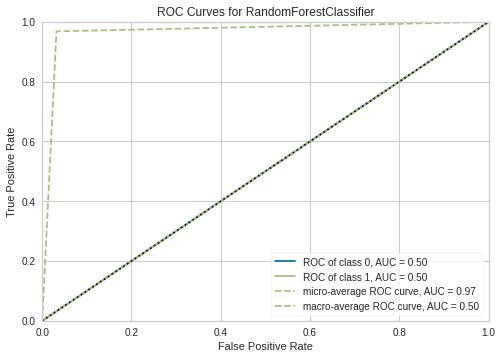

In [28]:
plot_model(tuned_rf, plot = 'auc')

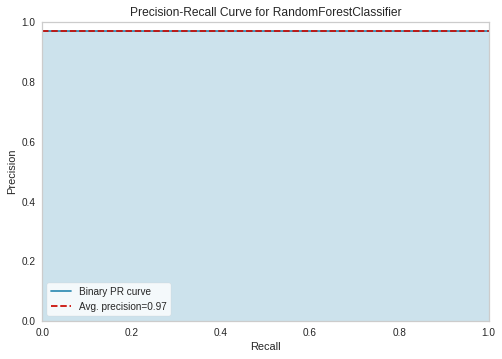

In [29]:
plot_model(tuned_rf, plot = 'pr')

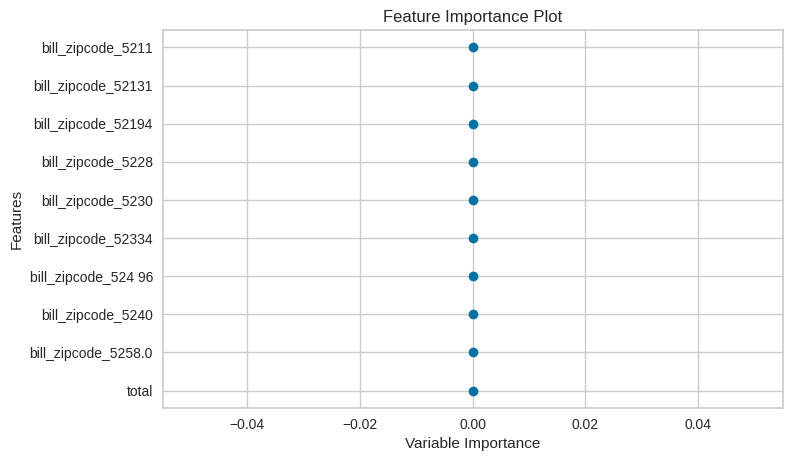

In [30]:
plot_model(tuned_rf, plot='feature')

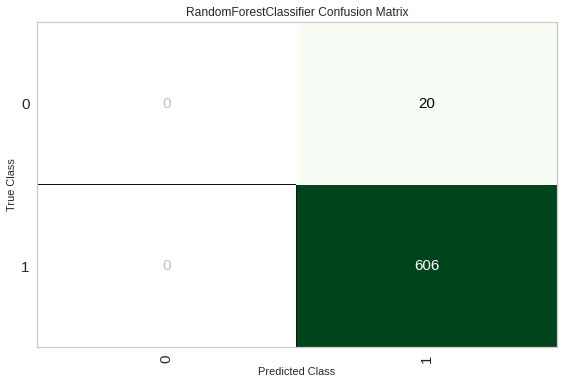

In [31]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [32]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9681,0.5,1.0,0.9681,0.9838,0.0,0.0


In [35]:
unseen_predictions = predict_model(tuned_rf, data=data_unseen)
unseen_predictions.head()

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,quantity,completed_year,completed_month,completed_day,Label,Score
0,Klippkungen,ready,1632.00,SEK,TIMMELE,52392,SE,1,2018,6,17,shipped,0.9698
1,Klippkungen,shipped,357.00,SEK,Uddevalla,45161,SE,1,2018,12,9,shipped,0.9698
2,Klippkungen,ready,2457.00,SEK,Uppsala,75244,SE,1,2019,5,10,shipped,0.9698
3,Klippkungen,shipped,337.22,NOK,Jakobsli,7058,NO,1,2018,6,3,shipped,0.9698
4,Klippkungen,shipped,345.78,NOK,Sandefjord,3244,NO,1,2018,6,17,shipped,0.9698
